___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [6]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [7]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [8]:
# Bank of America
BAC = data.DataReader('BAC', 'yahoo', start, end)

# CitiGroup
C = data.DataReader('C', 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader('GS', 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader('JPM', 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader('MS', 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader('WFC', 'yahoo', start, end)

In [9]:
# could do this for Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], 'yahoo', start, end)

/Users/liyixuan1121/anaconda/lib/python3.6/site-packages/pandas_datareader/yahoo/daily.py:136: SymbolWarning: Failed to read symbol: 'BAC', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/liyixuan1121/anaconda/lib/python3.6/site-packages/pandas_datareader/yahoo/daily.py:136: SymbolWarning: Failed to read symbol: 'C', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/liyixuan1121/anaconda/lib/python3.6/site-packages/pandas_datareader/yahoo/daily.py:136: SymbolWarning: Failed to read symbol: 'GS', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/liyixuan1121/anaconda/lib/python3.6/site-packages/pandas_datareader/yahoo/daily.py:136: SymbolWarning: Failed to read symbol: 'JPM', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/liyixuan1121/anaconda/lib/python3.6/site-packages/pandas_datareader/yahoo/daily.py:136: SymbolWarning: Failed to read symbol: 'MS', replacing with NaN.
  warnings.w

RemoteDataError: No data fetched using 'YahooDailyReader'

In [10]:
MS.head()

Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2006-01-03  57.169998  58.490002  56.740002  58.310001  40.062382  5377000
2006-01-04  58.700001  59.279999  58.349998  58.349998  40.089870  7977800
2006-01-05  58.549999  58.590000  58.020000  58.509998  40.199799  5778000
2006-01-06  58.770000  58.849998  58.049999  58.570000  40.241035  6889800
2006-01-09  58.630001  59.290001  58.619999  59.189999  40.666996  4144500

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [11]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [12]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys=tickers)

bank_stocks.head()

BAC                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2006-01-03  46.919998  47.180000  46.150002  47.080002  37.000080  16296700   
2006-01-04  47.000000  47.240002  46.450001  46.580002  36.607124  17757900   
2006-01-05  46.580002  46.830002  46.320000  46.639999  36.654278  14970700   
2006-01-06  46.799999  46.910000  46.349998  46.570000  36.599277  12599800   
2006-01-09  46.720001  46.970001  46.360001  46.599998  36.622845  15619400   

                     C                                        ...     \
                  Open        High         Low       Close    ...      
Date                                                          ...      
2006-01-03  490.000000  493.799988  481.100006  492.899994    ...      
2006-01-04  488.600006  491.000000  483.500000  483.799988    ...      
2006-01-05  484.399994  487.799988  484.000000  486.200012    ...      
2006-01-06  488.799988  489.000000  482.000000  486.200012    ...      
2006-01-09  486.000000  487.399994  483.000000  483.899994    ...      

                   MS                                       WFC             \
                  Low      Close  Adj Close   Volume       Open       High   
Date                                                                         
2006-01-03  56.740002  58.310001  40.062382  5377000  31.600000  31.975000   
2006-01-04  58.349998  58.349998  40.089870  7977800  31.799999  31.820000   
2006-01-05  58.020000  58.509998  40.199799  5778000  31.500000  31.555000   
2006-01-06  58.049999  58.570000  40.241035  6889800  31.580000  31.775000   
2006-01-09  58.619999  59.189999  40.666996  4144500  31.674999  31.825001   

                                                       
                  Low      Close  Adj Close    Volume  
Date                                                   
2006-01-03  31.195000  31.900000  23.077190  11016400  
2006-01-04  31.365000  31.530001  22.809519  10870000  
2006-01-05  31.309999  31.495001  22.784204  10158000  
2006-01-06  31.385000  31.680000  22.918036   8403800  
2006-01-09  31.555000  31.674999  22.914423   5619600  

[5 rows x 36 columns]

** Set the column name levels (this is filled out for you):**

In [13]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  37.000080  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  36.607124  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  36.654278  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  36.599277  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  36.622845  15619400   

Bank Ticker           C                                        ...     \
Stock Info         Open        High         Low       Close    ...      
Date                                                           ...      
2006-01-03   490.000000  493.799988  481.100006  492.899994    ...      
2006-01-04   488.600006  491.000000  483.500000  483.799988    ...      
2006-01-05   484.399994  487.799988  484.000000  486.200012    ...      
2006-01-06   488.799988  489.000000  482.000000  486.200012    ...      
2006-01-09   486.000000  487.399994  483.000000  483.899994    ...      

Bank Ticker         MS                                       WFC             \
Stock Info         Low      Close  Adj Close   Volume       Open       High   
Date                                                                          
2006-01-03   56.740002  58.310001  40.062382  5377000  31.600000  31.975000   
2006-01-04   58.349998  58.349998  40.089870  7977800  31.799999  31.820000   
2006-01-05   58.020000  58.509998  40.199799  5778000  31.500000  31.555000   
2006-01-06   58.049999  58.570000  40.241035  6889800  31.580000  31.775000   
2006-01-09   58.619999  59.189999  40.666996  4144500  31.674999  31.825001   

Bank Ticker                                             
Stock Info         Low      Close  Adj Close    Volume  
Date                                                    
2006-01-03   31.195000  31.900000  23.077190  11016400  
2006-01-04   31.365000  31.530001  22.809519  10870000  
2006-01-05   31.309999  31.495001  22.784204  10158000  
2006-01-06   31.385000  31.680000  22.918036   8403800  
2006-01-09   31.555000  31.674999  22.914423   5619600  

[5 rows x 36 columns]

** Check the head of the bank_stocks dataframe.**

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [14]:
bank_stocks.head()
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [15]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [16]:
bank_stocks.head()
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()
    
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005874
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586   -0.000158

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

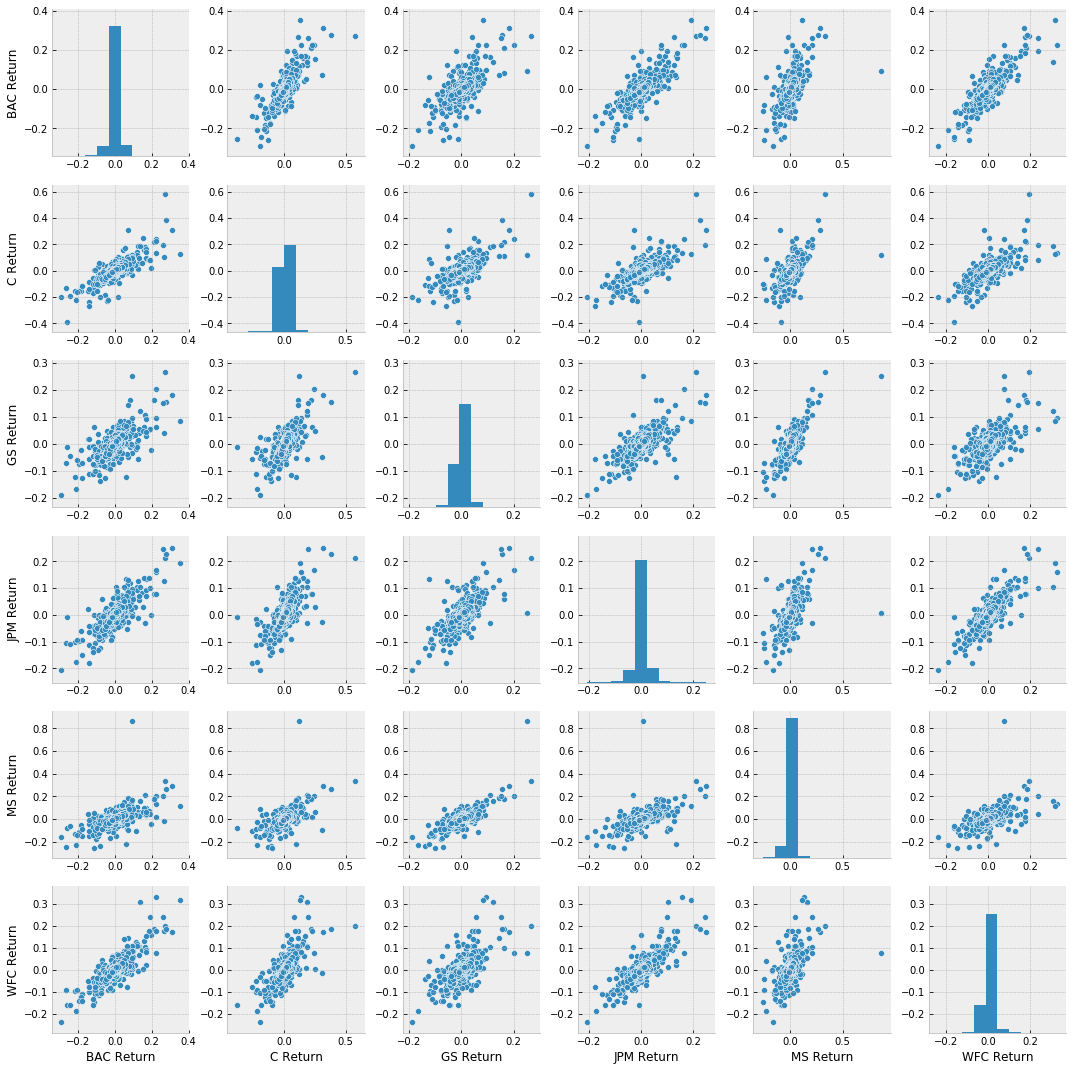

In [17]:
type(returns['BAC Return'].iloc[1])
# pair_data = returns[1:]
# pair_data.head()
# temp = pd.DataFrame()
# temp = pd.concat([temp, pair_data])
# temp.reset_index(inplace=True)
sns.pairplot(returns[1:].reset_index())

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [18]:
# Best Single Day Gain
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [19]:
# Worst Single Day Gain

returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [20]:
returns.ix['2015-01-01' : '2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

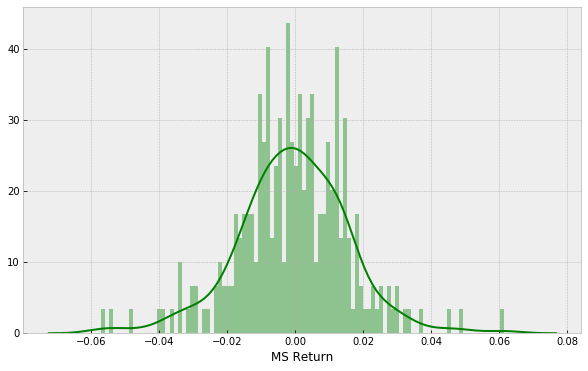

In [21]:
ms_return = returns['MS Return'].loc['2015-01-01' : '2015-12-31']
plt.figure(figsize=(10,6))
sns.distplot(ms_return, color = 'green', bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

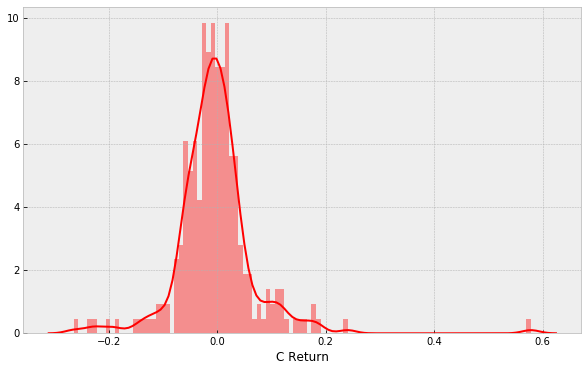

In [22]:
plt.figure(figsize=(10,6))
sns.distplot(returns.ix['2008-01-01' : '2008-12-31']['C Return'], color='red', bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [23]:
sns.set_style('whitegrid')
# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

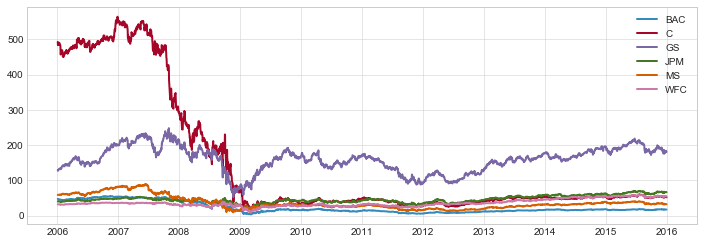

In [24]:
bank_stocks.head()
plt.figure(figsize=(12,4))
for tick in tickers:
    plt.plot(bank_stocks[tick]['Close'].dropna(), label=tick)
    
plt.legend()

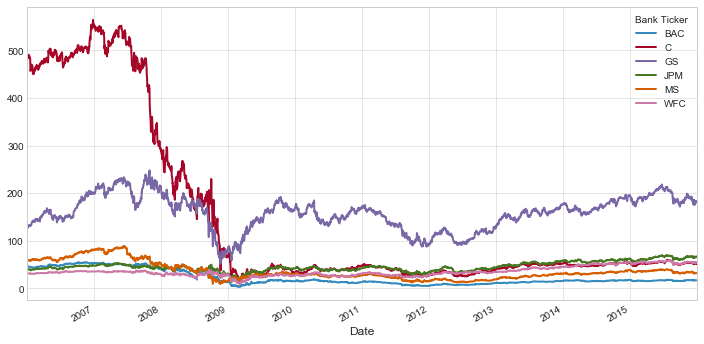

In [25]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(figsize=(12,6))

In [26]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

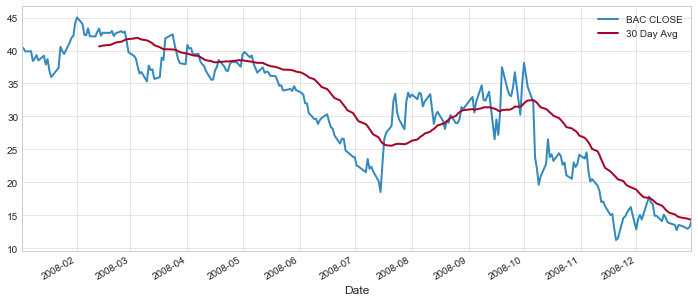

In [27]:
bank_stocks.head()
bank_stocks['BAC']['Close'].loc['2008-01-01' : '2008-12-31'].plot(figsize=(12,5), label='BAC CLOSE')
bank_stocks['BAC']['Close'].loc['2008-01-01' : '2008-12-31'].rolling(30).mean().dropna().plot(label = '30 Day Avg')

plt.legend()

In [28]:
bank_stocks['BAC']['Close'].loc['2008-01-01' : '2008-12-31'].iplot()
bank_stocks['BAC']['Close'].loc['2008-01-01' : '2008-12-31'].rolling(30).mean().dropna().iplot()

#pd = pd.concat([bank_stocks['BAC']['Close'].loc['2008-01-01' : '2008-12-31'], bank_stocks['BAC']['Close'].loc['2008-01-01' : '2008-12-31'].rolling(30).mean()])

** Create a heatmap of the correlation between the stocks Close Price.**

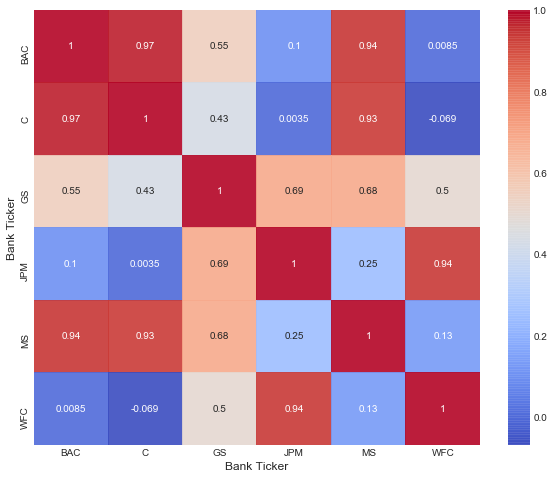

In [29]:
bank_stocks.head()
plt.figure(figsize=(10,8))
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True, cmap='coolwarm', alpha=0.9)

In [30]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr().iplot(kind='heatmap', colorscale="")

** Optional: Use seaborn's clustermap to cluster the correlations together:**

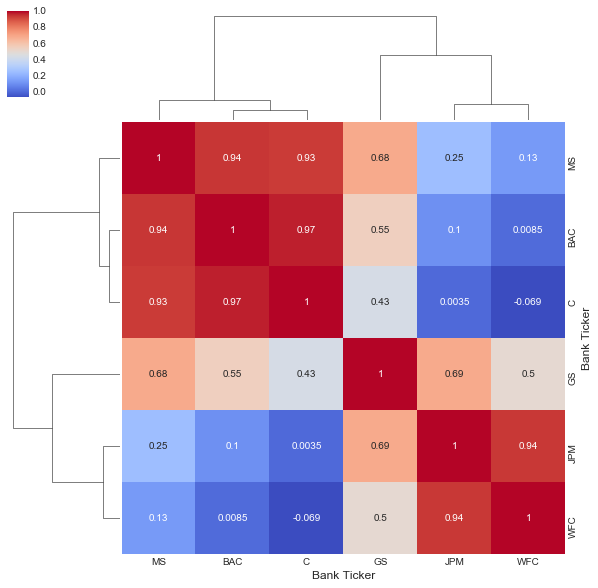

In [31]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), cmap='coolwarm', annot=True)

In [32]:
close_corr = bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()
close_corr.iplot(kind='heatmap', colorscale='rdylbu')

# Part 2
In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [33]:
BAC.head()
BAC[['Open', 'High', 'Low', 'Close']].ix['2015-01-01' : '2016-01-01'].iplot(kind='candle')

In [34]:
BAC[['Open', 'High', 'Low', 'Close']].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [35]:
MS['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='sma', periods=[13,21,55], title='Simple Moving Avarages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [36]:
BAC['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.

[Your can find more in Python_For_Financial_and_Algorithmic_Trading Repo](https://github.com/egbertli/Machine-Learning-and-Quantitative-analysis/tree/master/Python_For_Financial_and_Algorithmic_Trading)

# Good luck!